In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parents[0]
sys.path.insert(0, str(PROJECT_ROOT))

In [2]:
# Third-party
from PIL import Image

# Project imports
from multimodal_fewshot_prompting.prompts import get_prompt_builder
from multimodal_fewshot_prompting.vision import image_to_base64
from multimodal_fewshot_prompting.llm.ollama import llm
from multimodal_fewshot_prompting.schemas import parser


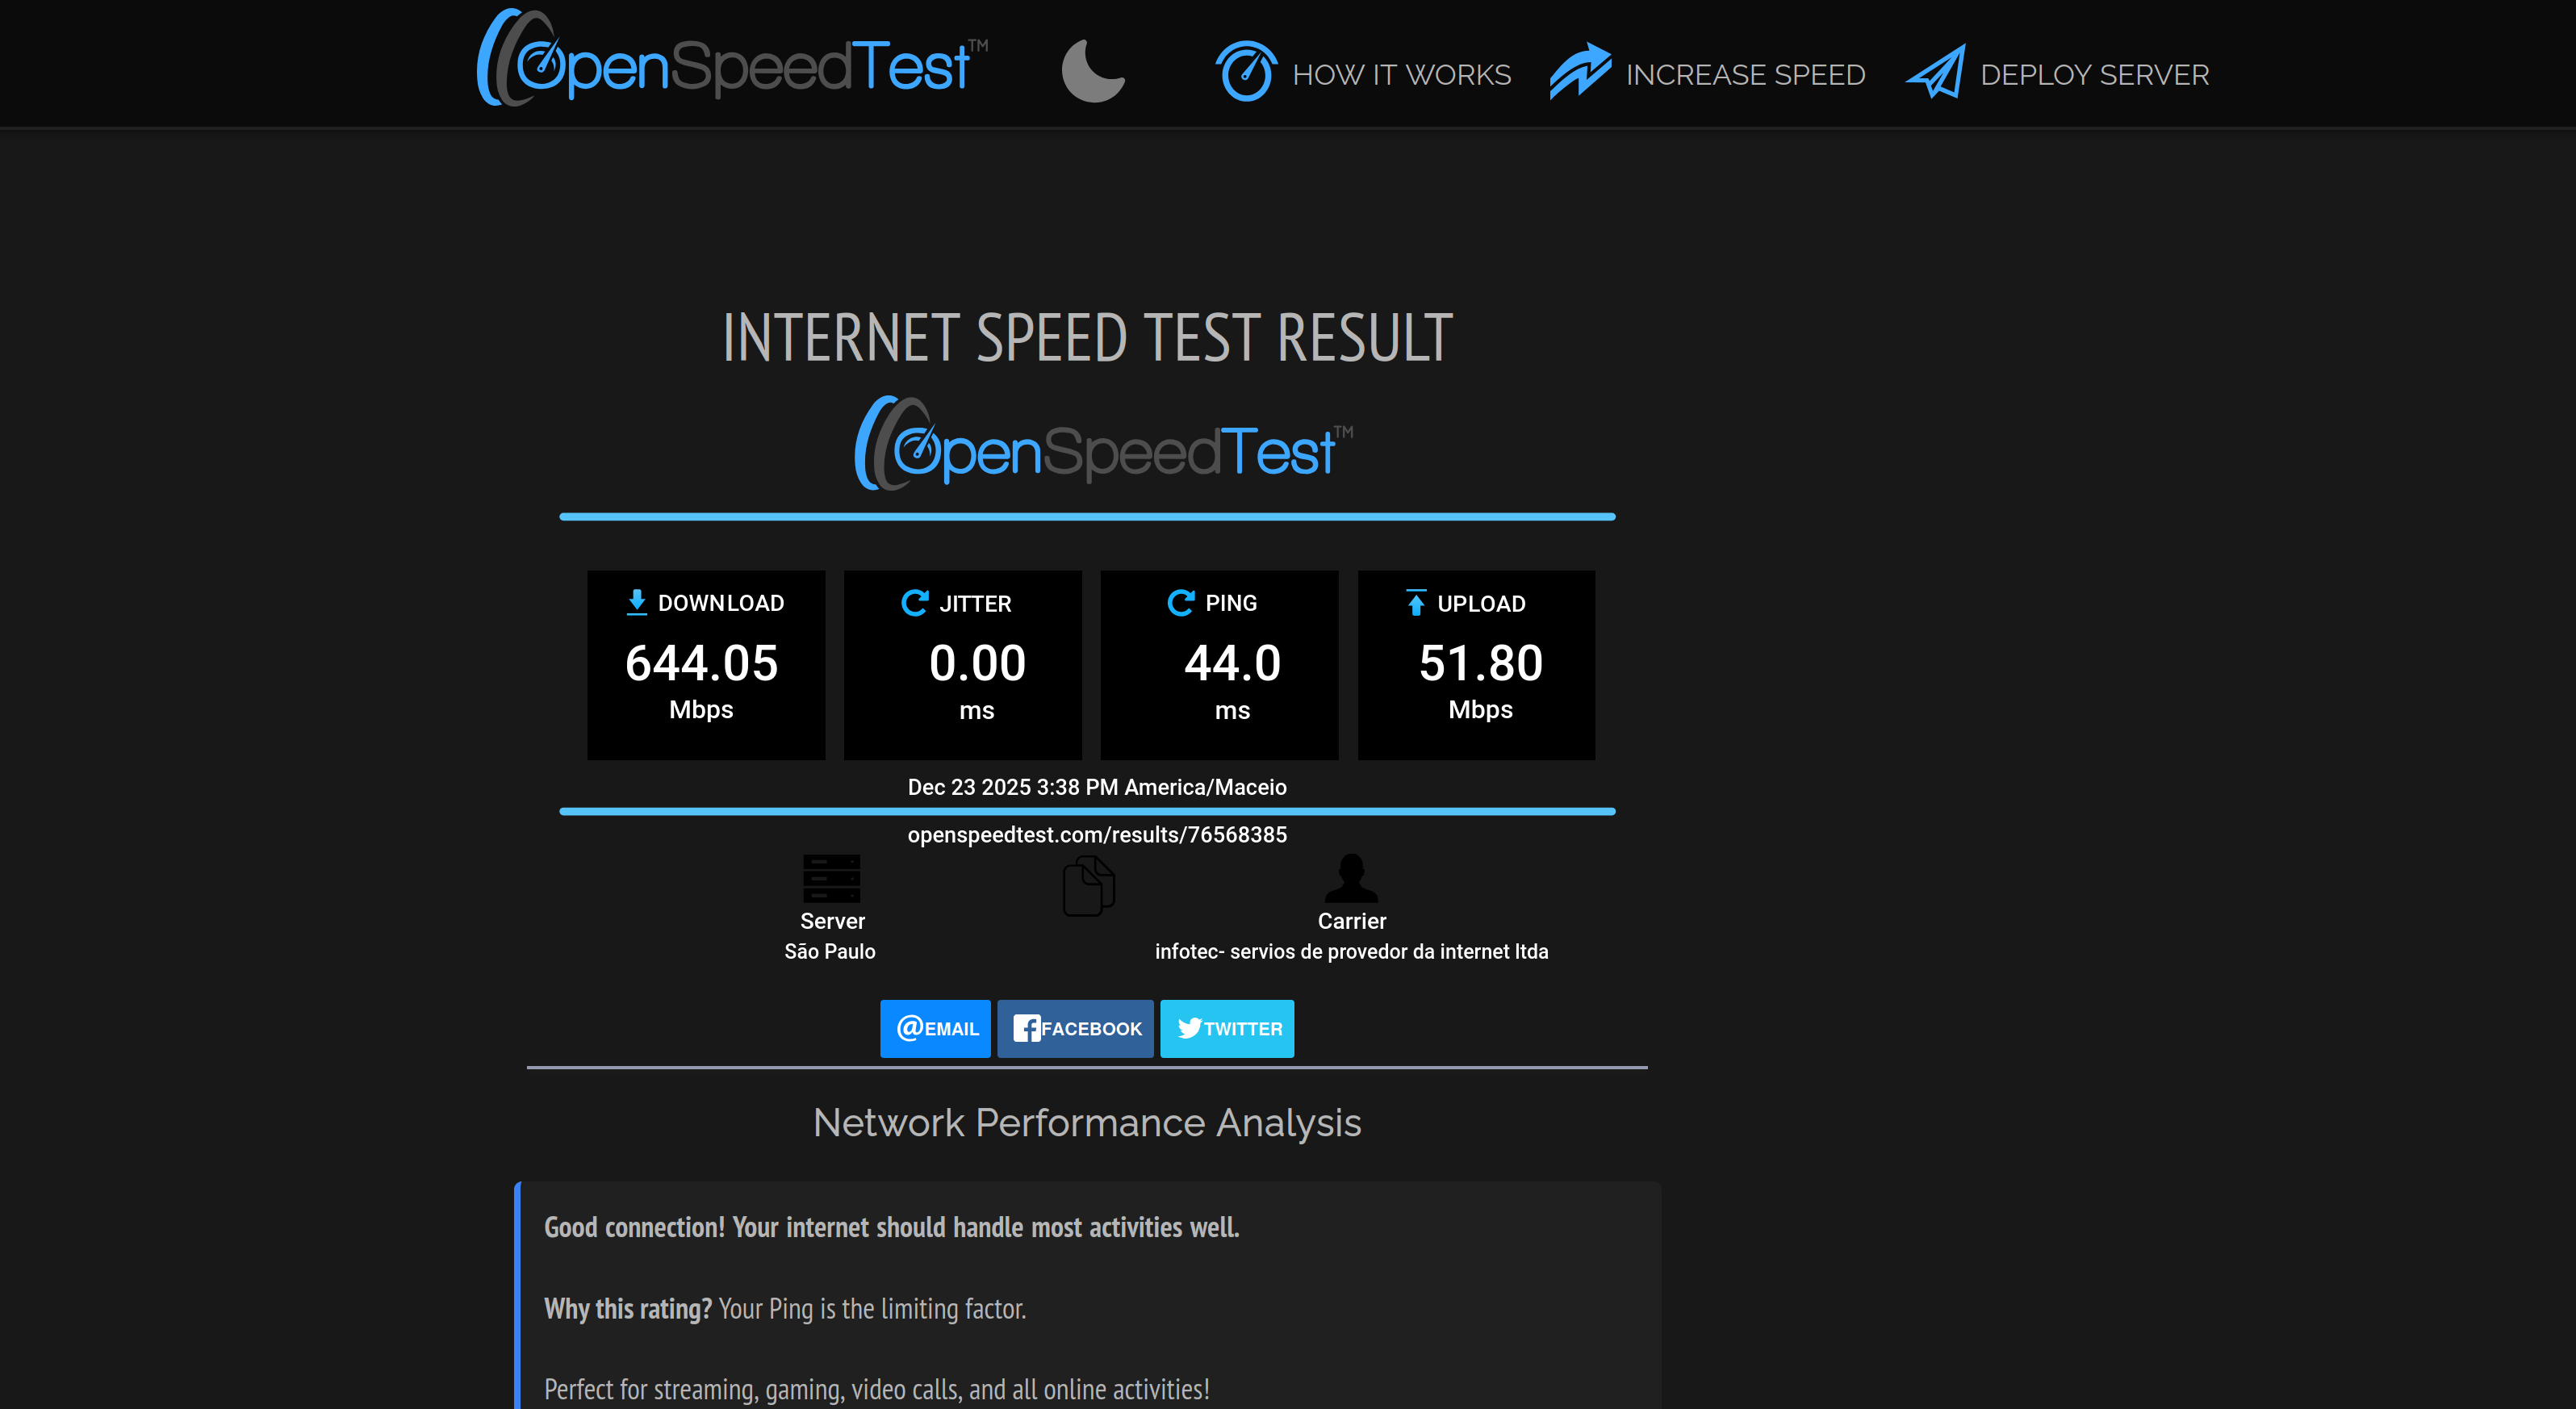

In [3]:
image = Image.open('../data/validation/openspeedtest_validation_01.png')
image

# Zero Shot

In [4]:
prompt_builder = get_prompt_builder("zero-shot")

In [5]:
image_b64 = image_to_base64(image)

message = prompt_builder(image_b64)

response = llm.invoke(message)
print(response.content)

{
  "download": 644.05,
  "upload": 51.8,
  "ping": 80
}


# Few Shot

In [6]:
prompt_builder = get_prompt_builder("few-shot")

In [7]:
image_b64 = image_to_base64(image)

message = prompt_builder(image_b64)

response = llm.invoke(message)
print(response.content)

{
  "download": 644.05,
  "upload": 51.8,
  "ping": 44.0
}


In [9]:
type(response.content)

str

In [10]:
result = parser.parse(response.content)
result

{'download': 644.05, 'upload': 51.8, 'ping': 44.0}

In [12]:
type(result)

dict